In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
from sklearn.metrics import mean_squared_error
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import files
from numpy import loadtxt
from google.colab import files
from keras.layers import Dropout,Dense, Flatten
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Flatten,Input,Conv1D,MaxPooling1D
from tensorflow.keras.models import Model
#LSTM
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.optimizers import SGD
from tensorflow.keras.layers import LSTM
pd.set_option('display.max_columns', None)

In [2]:
df_first_sheet = pd.read_excel('/content/70fn_20240507_1k_s3.xlsx','training data')

df_first_sheet.head()

,Resistance_ohm,Power_watt,Displacement_mm,Time_sec
0,101.041531,0.093248,0.059585,0.001
1,101.041516,0.093242,0.058482,0.002
2,101.040253,0.093250,0.058015,0.003
3,101.031658,0.093248,0.057353,0.004
4,101.040541,0.093247,0.057048,0.005


In [3]:
validation_data = pd.read_excel('/content/70fn_20240507_1k_s3.xlsx','validation data')

validation_data.head()

,Resistance_ohm,Power_watt,Displacement_mm,Time_sec
0,101.143806,0.093213,0.057597,0.001
1,101.135491,0.093198,0.057049,0.002
2,101.137325,0.093180,0.056616,0.003
3,101.141279,0.093173,0.056546,0.004
4,101.123621,0.093195,0.056232,0.005


[[[9.32482906e-02 1.01041531e+02]
  [9.32420904e-02 1.01041516e+02]
  [9.32502095e-02 1.01040253e+02]
  ...
  [9.32531667e-02 1.01049182e+02]
  [9.32495351e-02 1.01054404e+02]
  [9.32479503e-02 1.01036281e+02]]

 [[9.32420904e-02 1.01041516e+02]
  [9.32502095e-02 1.01040253e+02]
  [9.32483490e-02 1.01031658e+02]
  ...
  [9.32495351e-02 1.01054404e+02]
  [9.32479503e-02 1.01036281e+02]
  [9.32443065e-02 1.01016105e+02]]

 [[9.32502095e-02 1.01040253e+02]
  [9.32483490e-02 1.01031658e+02]
  [9.32469305e-02 1.01040541e+02]
  ...
  [9.32479503e-02 1.01036281e+02]
  [9.32443065e-02 1.01016105e+02]
  [9.32504862e-02 1.01021103e+02]]

 ...

 [[9.32526538e-02 1.01581516e+02]
  [9.32568462e-02 1.01584834e+02]
  [9.32438778e-02 1.01582672e+02]
  ...
  [9.32321548e-02 1.01586788e+02]
  [9.32376216e-02 1.01592919e+02]
  [9.32288613e-02 1.01573881e+02]]

 [[9.32568462e-02 1.01584834e+02]
  [9.32438778e-02 1.01582672e+02]
  [9.32434184e-02 1.01579836e+02]
  ...
  [9.32376216e-02 1.01592919e+02]
  [9

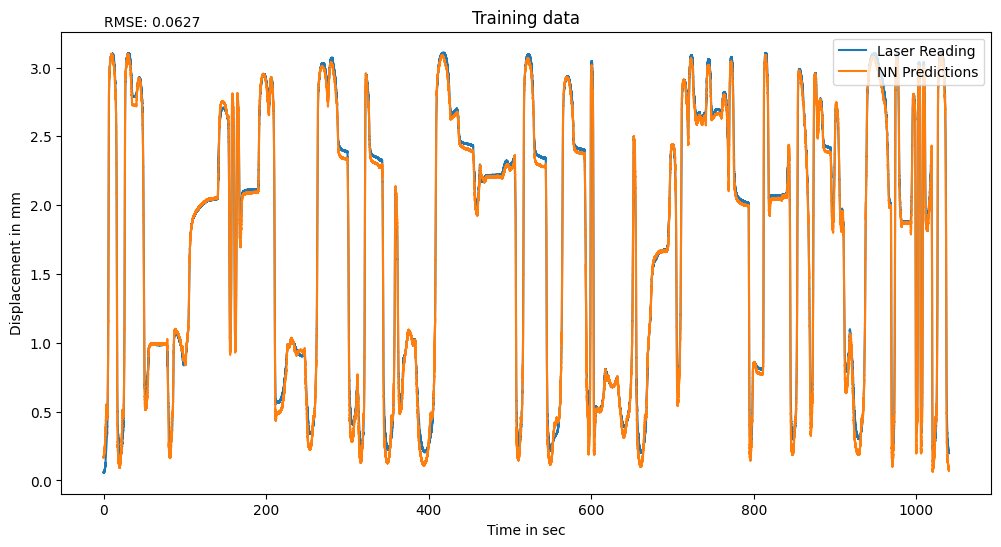

In [ ]:
power_data = df_first_sheet['Power_watt'].values
resistance_data = df_first_sheet['Resistance_ohm'].values
displacement_data = df_first_sheet['Displacement_mm'].values
time_data = df_first_sheet['Time_sec'].values

sequence_length = 10
n_features = 2

def create_sequences(power, resistance, displacement, time, seq_length):
    X = []
    y = []
    z = []
    for i in range(seq_length, len(power)):
        X.append(np.stack((power[i-seq_length:i], resistance[i-seq_length:i]), axis=-1))
        y.append(displacement[i])
        z.append(time[i])
    return np.array(X), np.array(y), np.array(z)

X, y, z = create_sequences(power_data, resistance_data, displacement_data, time_data, sequence_length)
print(X)
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(sequence_length, n_features)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation = 'linear')) # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X, y, epochs=20, batch_size=100)

predictions = model.predict(X)
rms = mean_squared_error(y, predictions, squared=False)
print('RMSE=',rms)

plt.figure(figsize=(12,6))
plt.plot(z,y, label='Laser Reading')
plt.plot(z,predictions, label='NN Predictions')
plt.title('Training data')
plt.ylabel('Displacement in mm')
plt.xlabel('Time in sec')
plt.text(0.05, 3.3, f"RMSE: {rms:.4f}")
plt.legend(loc = 'upper right')
plt.show()




In [ ]:
print(predictions)

[[0.71503174]
 [0.7155057 ]
 [0.7148706 ]
 ...
 [0.5976926 ]
 [0.5967866 ]
 [0.5961925 ]]


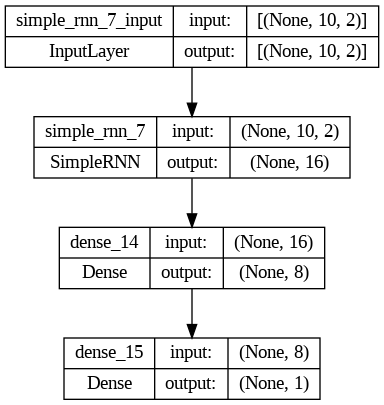

In [ ]:
plot_model(model, to_file='/content/SIMPLE_model_architecture.png', show_shapes=True, show_layer_names=True)

[[[9.32130799e-02 1.01143806e+02]
  [9.31982914e-02 1.01135491e+02]
  [9.31803328e-02 1.01137325e+02]
  ...
  [9.32841700e-02 1.01125122e+02]
  [9.32671956e-02 1.01124370e+02]
  [9.32525760e-02 1.01121741e+02]]

 [[9.31982914e-02 1.01135491e+02]
  [9.31803328e-02 1.01137325e+02]
  [9.31730427e-02 1.01141279e+02]
  ...
  [9.32671956e-02 1.01124370e+02]
  [9.32525760e-02 1.01121741e+02]
  [9.32443658e-02 1.01127253e+02]]

 [[9.31803328e-02 1.01137325e+02]
  [9.31730427e-02 1.01141279e+02]
  [9.31947405e-02 1.01123621e+02]
  ...
  [9.32525760e-02 1.01121741e+02]
  [9.32443658e-02 1.01127253e+02]
  [9.32180817e-02 1.01131139e+02]]

 ...

 [[9.32175000e-02 1.01549178e+02]
  [9.31998062e-02 1.01548356e+02]
  [9.31987393e-02 1.01557546e+02]
  ...
  [9.32014038e-02 1.01559538e+02]
  [9.32043789e-02 1.01556910e+02]
  [9.32008862e-02 1.01560385e+02]]

 [[9.31998062e-02 1.01548356e+02]
  [9.31987393e-02 1.01557546e+02]
  [9.31976527e-02 1.01558935e+02]
  ...
  [9.32043789e-02 1.01556910e+02]
  [9

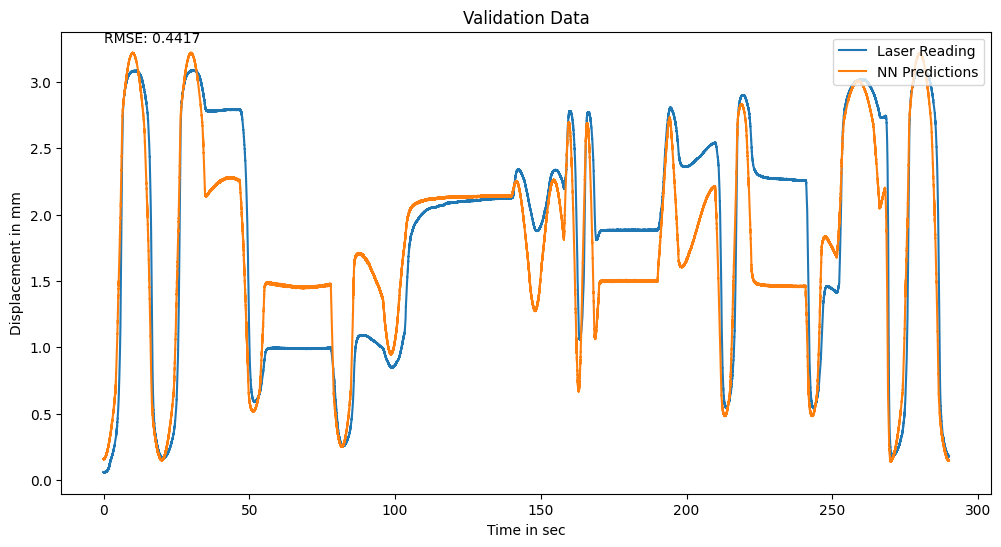

In [11]:
power_data = validation_data['Power_watt'].values
resistance_data = validation_data['Resistance_ohm'].values
displacement_data = validation_data['Displacement_mm'].values
time_data = validation_data['Time_sec'].values

sequence_length = 10
n_features = 2

def create_sequences(power, resistance, displacement, time, seq_length):
    X = []
    y = []
    z = []
    for i in range(seq_length, len(power)):
        X.append(np.stack((power[i-seq_length:i], resistance[i-seq_length:i]), axis=-1))
        y.append(displacement[i])
        z.append(time[i])
    return np.array(X), np.array(y), np.array(z)

X, y, z = create_sequences(power_data, resistance_data, displacement_data, time_data, sequence_length)
print(X)
model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(sequence_length, n_features)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1,activation = 'linear')) # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X, y, epochs=20, batch_size=1000)

predictions = model.predict(X)
rms = mean_squared_error(y, predictions, squared=False)
print('RMSE=',rms)

plt.figure(figsize=(12,6))
plt.plot(z,y, label='Laser Reading')
plt.plot(z,predictions, label='NN Predictions')
plt.title('Validation Data')
plt.ylabel('Displacement in mm')
plt.xlabel('Time in sec')
plt.text(0.05, 3.3, f"RMSE: {rms:.4f}")
plt.legend(loc = 'upper right')
plt.show()

[[[9.32482906e-02 1.01041531e+02]
  [9.32420904e-02 1.01041516e+02]
  [9.32502095e-02 1.01040253e+02]
  ...
  [9.32531667e-02 1.01049182e+02]
  [9.32495351e-02 1.01054404e+02]
  [9.32479503e-02 1.01036281e+02]]

 [[9.32420904e-02 1.01041516e+02]
  [9.32502095e-02 1.01040253e+02]
  [9.32483490e-02 1.01031658e+02]
  ...
  [9.32495351e-02 1.01054404e+02]
  [9.32479503e-02 1.01036281e+02]
  [9.32443065e-02 1.01016105e+02]]

 [[9.32502095e-02 1.01040253e+02]
  [9.32483490e-02 1.01031658e+02]
  [9.32469305e-02 1.01040541e+02]
  ...
  [9.32479503e-02 1.01036281e+02]
  [9.32443065e-02 1.01016105e+02]
  [9.32504862e-02 1.01021103e+02]]

 ...

 [[9.32526538e-02 1.01581516e+02]
  [9.32568462e-02 1.01584834e+02]
  [9.32438778e-02 1.01582672e+02]
  ...
  [9.32321548e-02 1.01586788e+02]
  [9.32376216e-02 1.01592919e+02]
  [9.32288613e-02 1.01573881e+02]]

 [[9.32568462e-02 1.01584834e+02]
  [9.32438778e-02 1.01582672e+02]
  [9.32434184e-02 1.01579836e+02]
  ...
  [9.32376216e-02 1.01592919e+02]
  [9

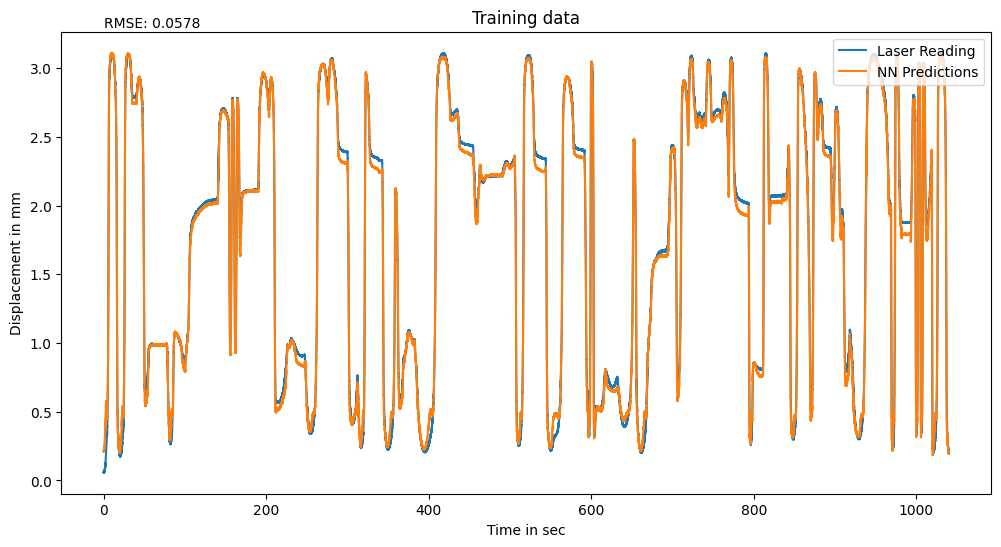

In [5]:
power_data = df_first_sheet['Power_watt'].values
resistance_data = df_first_sheet['Resistance_ohm'].values
displacement_data = df_first_sheet['Displacement_mm'].values
time_data = df_first_sheet['Time_sec'].values

sequence_length = 10
n_features = 2

def create_sequences(power, resistance, displacement, time, seq_length):
    X = []
    y = []
    z = []
    for i in range(seq_length, len(power)):
        X.append(np.stack((power[i-seq_length:i], resistance[i-seq_length:i]), axis=-1))
        y.append(displacement[i])
        z.append(time[i])
    return np.array(X), np.array(y), np.array(z)

X, y, z = create_sequences(power_data, resistance_data, displacement_data, time_data, sequence_length)
print(X)
model = Sequential()
model.add(LSTM(16, activation='tanh', return_sequences= True ,input_shape=(sequence_length, n_features)))
model.add(LSTM(8, activation = 'tanh'))
model.add(Dense(1)) # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X, y, epochs=20, batch_size=1000)

predictions = model.predict(X)
rms = mean_squared_error(y, predictions, squared=False)
print('RMSE=',rms)

plt.figure(figsize=(12,6))
plt.plot(z,y, label='Laser Reading')
plt.plot(z,predictions, label='NN Predictions')
plt.title('Training data')
plt.ylabel('Displacement in mm')
plt.xlabel('Time in sec')
plt.text(0.05, 3.3, f"RMSE: {rms:.4f}")
plt.legend(loc = 'upper right')
plt.show()



[[[9.32130799e-02 1.01143806e+02]
  [9.31982914e-02 1.01135491e+02]
  [9.31803328e-02 1.01137325e+02]
  ...
  [9.32841700e-02 1.01125122e+02]
  [9.32671956e-02 1.01124370e+02]
  [9.32525760e-02 1.01121741e+02]]

 [[9.31982914e-02 1.01135491e+02]
  [9.31803328e-02 1.01137325e+02]
  [9.31730427e-02 1.01141279e+02]
  ...
  [9.32671956e-02 1.01124370e+02]
  [9.32525760e-02 1.01121741e+02]
  [9.32443658e-02 1.01127253e+02]]

 [[9.31803328e-02 1.01137325e+02]
  [9.31730427e-02 1.01141279e+02]
  [9.31947405e-02 1.01123621e+02]
  ...
  [9.32525760e-02 1.01121741e+02]
  [9.32443658e-02 1.01127253e+02]
  [9.32180817e-02 1.01131139e+02]]

 ...

 [[9.32175000e-02 1.01549178e+02]
  [9.31998062e-02 1.01548356e+02]
  [9.31987393e-02 1.01557546e+02]
  ...
  [9.32014038e-02 1.01559538e+02]
  [9.32043789e-02 1.01556910e+02]
  [9.32008862e-02 1.01560385e+02]]

 [[9.31998062e-02 1.01548356e+02]
  [9.31987393e-02 1.01557546e+02]
  [9.31976527e-02 1.01558935e+02]
  ...
  [9.32043789e-02 1.01556910e+02]
  [9

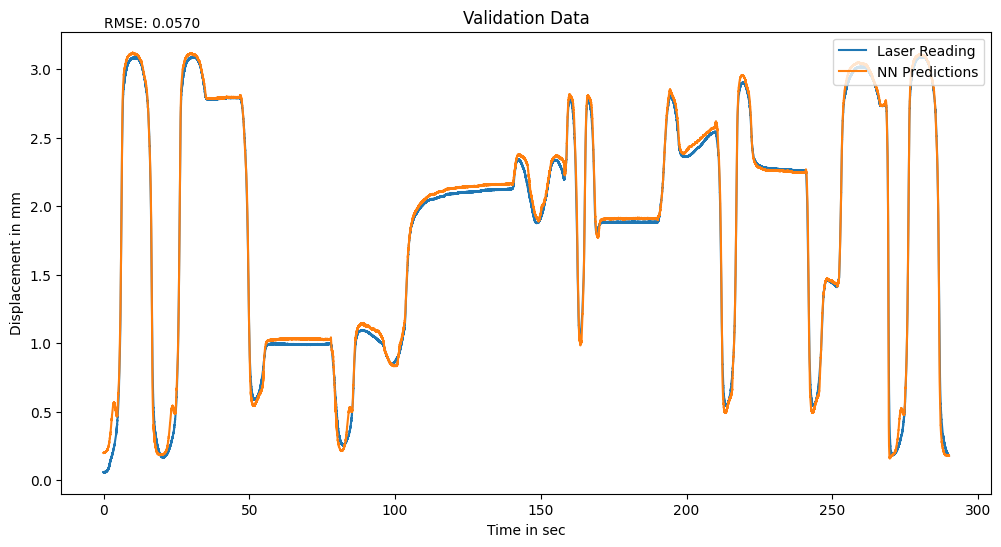

In [10]:
power_data = validation_data['Power_watt'].values
resistance_data = validation_data['Resistance_ohm'].values
displacement_data = validation_data['Displacement_mm'].values
time_data = validation_data['Time_sec'].values

sequence_length = 10
n_features = 2

def create_sequences(power, resistance, displacement, time, seq_length):
    X = []
    y = []
    z = []
    for i in range(seq_length, len(power)):
        X.append(np.stack((power[i-seq_length:i], resistance[i-seq_length:i]), axis=-1))
        y.append(displacement[i])
        z.append(time[i])
    return np.array(X), np.array(y), np.array(z)

X, y, z = create_sequences(power_data, resistance_data, displacement_data, time_data, sequence_length)
print(X)
model = Sequential()
model.add(LSTM(16, activation='tanh',return_sequences=True, input_shape=(sequence_length, n_features)))
model.add(LSTM(8, activation = 'tanh'))
model.add(Dense(1,activation = 'linear')) # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X, y, epochs=20, batch_size=100)

predictions = model.predict(X)
rms = mean_squared_error(y, predictions, squared=False)
print('RMSE=',rms)

plt.figure(figsize=(12,6))
plt.plot(z,y, label='Laser Reading')
plt.plot(z,predictions, label='NN Predictions')
plt.title('Validation Data')
plt.ylabel('Displacement in mm')
plt.xlabel('Time in sec')
plt.text(0.05, 3.3, f"RMSE: {rms:.4f}")
plt.legend(loc = 'upper right')
plt.show()